# Donovan Feist

# CH EN 3603

# Homework 9

# Problem 3

Ninety-five percent of the acetone vapor in an 85 vol% air stream is to be absorbed by countercurrent contact with pure water in a valve-tray column with an expected overall tray efficiency of 50%. The column will operate at 20C and 101 kPa. Equilibrium data for acetone–water at these conditions are:

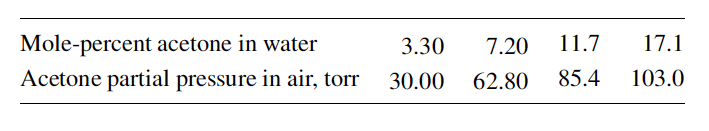

Calculate:

(a) the minimum value of $\frac{L^{'}}{V^{'}}$, the ratio mol H2O/mol air;

(b) $N_t$, using a value of $\frac{L^{'}}{V^{'}}$ of 1.25 times the minimum;

(c) the mole fraction of acetone in the exit water.

From Table 5.2 for N connected equilibrium stages, there are 2N + 2C + 5 degrees of freedom. Specified in this problem are:

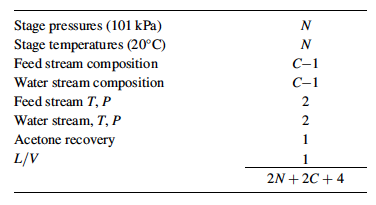

The last specification is the gas feed rate at $100 \frac{kmol}{h}$.

## part a solution

To find the $\frac{L_{min}^{'}}{V^{'}}$, the given equilibrium data must first be converted into X and Y data. This can be done for the liquid data with the equation

### $X=\frac{x_a\%/100}{1-x_a\%/100}$

where $x_a\%$ is the mole percent of acetone in water.

This can be done fore the vapor data with the equation

### $Y=\frac{p_a/P}{1-p_a/P}$

where $p_a$ is the partial pressure of acetone in air, and P is the total pressure.

In [16]:
#imports
import numpy as np
import matplotlib.pyplot as plt

P=101*1000*760/101325 #torr

x_a_percent=np.array([0,3.30,7.20,11.7,17.1])
X=(x_a_percent/100)/(1-x_a_percent/100)
print('X=',X)

p_a=np.array([0,30.00,62.80,85.4,103.0])
Y=(p_a/P)/(1-p_a/P)
print('Y=',Y)

X= [0.         0.03412616 0.07758621 0.13250283 0.20627262]
Y= [0.         0.04123358 0.09039063 0.12705265 0.15735706]


Next, $Y_{N+1}$ can be found with the equation

### $Y_{N+1}=\frac{y_{N+1}}{1-y_{N+1}}$

where $y_{N+1}$ is the mole fraction of the acetone of the entering vapor stream.

In [17]:
y_Np1=0.15

Y_Np1=y_Np1/(1-y_Np1)
print('Y_N+1=',Y_Np1)

Y_N+1= 0.17647058823529413


Next, $X_0$ and $Y_1$ must be calculated to determine the starting point of the operating line.

Since the feed solvent is pure water, $X_0=0$.

$Y_1$ must be determined using the desired molar absorbtion fraction $\alpha$. This can be done with the equation

### $Y_1=(1-\alpha) \cdot Y_{N+1}$

In [18]:
X0=0
print('X0=',X0)

α=0.95
Y1=(1-α)*Y_Np1
print('Y1=',Y1)  

X0= 0
Y1= 0.008823529411764714


$X_{N+1}$ can then be determined by interpolation using $Y_{N+1}$ and the X and Y data.

In [19]:
X_Np1=np.interp(Y_Np1,Y,X)
print(X_Np1)

0.20627261761158025


When the values of $X_0$, $Y_1$, $X_{N+1}$, and $Y_{N+1}$ are used to plot an operating line on the same plot as the equilibrium data, it is revealed that to get to $(X_{N+1},Y_{N+1})$, the operating line must cross the equilibrium curve twice. This is physically impossible, and thus another approach must be used.

A graphical approach is used insted. The equilibrium curve is plotted, then an operating line is plotted that starts at $(X_0,Y_1)$, and a value for $\frac{L_{min}^{'}}{V^{'}}$ (the slope) is guessed. The slope is adjusted until it is tangent to the equilibrium curve. This is smallest possible value for $\frac{L_{min}^{'}}{V^{'}}$ with the given thermodynamics.

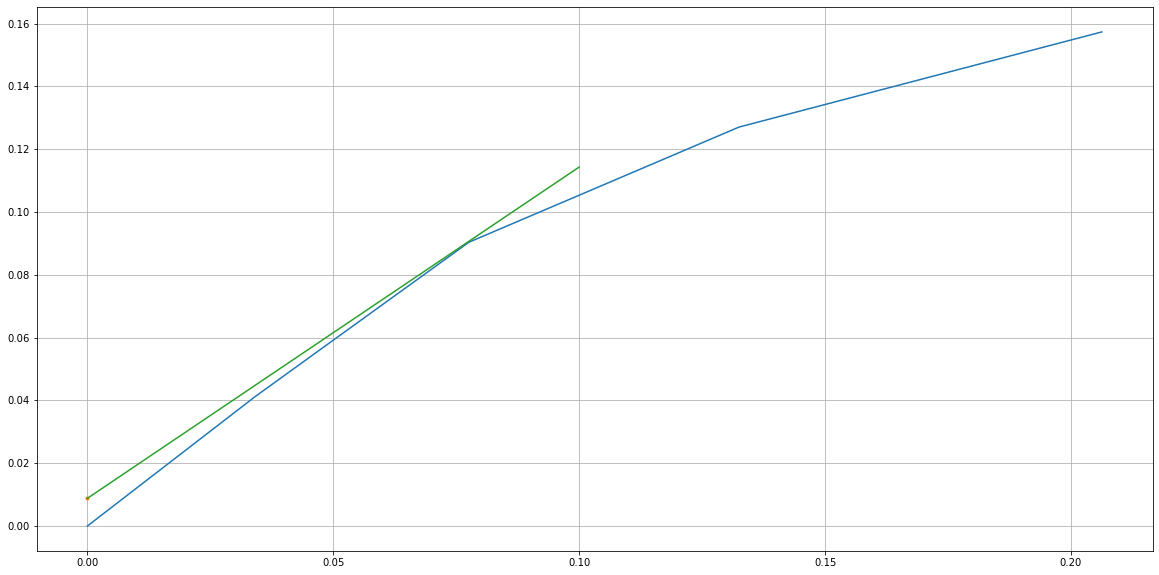

In [23]:
slope=1.055
point1=[X0,Y1]
XA=np.linspace(0,.1)
Y2=slope*XA+Y1


plt.figure(figsize=(20,10))
plt.plot(X,Y)
plt.plot(X0,Y1,'.')
plt.plot(XA,Y2)
plt.grid()
plt.show()

$\boxed{\frac{L_{min}^{'}}{V^{'}}=1.055}$

## part b solution

The value for $\frac{L^{'}}{V^{'}}$ for this part is 1.25 times the minimum value.

In [24]:
LpoVp=1.25*slope
print(LpoVp)

1.3187499999999999


Then, starting at the point $(X_0,Y_1)$, $X_1$ is calculated by interpolating from the equilibrium data with the known value of $Y_1$. This value for $X_1$ is then used to find the value for $Y_2$ on the operating line with the equation

### $Y_2=(X_1-X_0)\cdot \frac{L^{'}}{V^{'}} +Y_1$

The procedure is repeating in an iterative process until the calculated value for $Y_{N+1}$ is greater than or equal to the desired value for $Y_{N+1}$. When the is accomplished, the number of theoretical stages is N.

In [31]:
print('Y_Np1 desired=',Y_Np1)
print('X0=',X0)
print('Y1=',Y1)
X1=np.interp(Y1,Y,X)
print('X1=',X1)
Y2=(X1-X0)*LpoVp+Y1
print('Y2=',Y2)
X2=np.interp(Y2,Y,X)
print('X2=',X2)
Y3=(X2-X0)*LpoVp+Y1
print('Y3=',Y3)
X3=np.interp(Y3,Y,X)
print('X3=',X3)
Y4=(X3-X0)*LpoVp+Y1
print('Y4=',Y4)
X4=np.interp(Y4,Y,X)
print('X4=',X4)
Y5=(X4-X0)*LpoVp+Y1
print('Y5=',Y5)
X5=np.interp(Y5,Y,X)
print('X5=',X5)
Y6=(X5-X0)*LpoVp+Y1
print('Y6=',Y6)
X6=np.interp(Y6,Y,X)
print('X6=',X6)
Y7=(X6-X0)*LpoVp+Y1
print('Y7=',Y7)
X7=np.interp(Y7,Y,X)
print('X7=',X7)
Y8=(X7-X0)*LpoVp+Y1
print('Y8=',Y8)
X8=np.interp(Y8,Y,X)
print('X8=',X8)
Y9=(X8-X0)*LpoVp+Y1
print('Y9=',Y9)
X9=np.interp(Y9,Y,X)
print('X9=',X9)
Y10=(X9-X0)*LpoVp+Y1
print('Y10=',Y10)

Y_Np1 desired= 0.17647058823529413
X0= 0
Y1= 0.008823529411764714
X1= 0.007302620562239189
Y2= 0.018453860278217646
X2= 0.015272974478978787
Y3= 0.028964764505917985
X3= 0.02397211761761766
Y4= 0.040436759519998
X4= 0.03346668864131995
Y5= 0.05295772505750539
X5= 0.044491549543143986
Y6= 0.06749676037178584
X6= 0.05734559944608994
Y7= 0.08444803868129581
X7= 0.07233232811130952
Y8= 0.10421178710855414
X8= 0.0982891423076825
Y9= 0.138442335830021
X9= 0.1602286554727036
Y10= 0.22012506881639254


Because the value for $Y_{10}=Y_{N+1}=0.220$, which is the first value for Y to be greater than $Y_{N+1}=0.176$, there are $\fbox{9 theoretical stages}$.

## part c solution

To find the mole fraction of acetone in the exit liquid stream, the X value from the final stage (stage 8) is used with the equation

### $x_a=\frac{X_8}{1+X_8}$

In [33]:
x_a=X9/(1+X9)
print('x_a=',x_a)

x_a= 0.13810092925814074


The mole fraction of acetone in the exit water stream is $\boxed{x_a=0.138}$.